# Comparação de performance

Nesta aula vamos tentar responder à pergunta: como tornar nosso código em Python mais rápido? Para isso vamos avaliar aplicar dois exemplos, com graus de dificuldade diferentes, e resolve-os aplicando `for`, `comprenhension`, `generators`, `buil-in functions`, e `nuympy arrays`. Em cada exemplo será executado o código `n` vezes para conseguir identificar o tempo máximo, mínimo, médio, a variança do tempo e o desvio padrão.

Os dados foram obtidos:

- Processador Intel® Core™ i7-6500U
- Memória 16 Gb
- CPU @ 2.50GHz × 4
- Arquitetura 64 bits

Os resultados que serão apresentados não consideram o uso de Multithread ou implementações alternativas como PyPy ou Numba.



## Exemplo 1
Vamos trabalhar com um vetor de 1.000.000 de valore e estamos interessados aplicar a seguinte função:
$$f(x) = x^2$$
Para conseguir este resultado vamos aplicar:
  - for
  - list comprenhension
  - set comprenhension
  - generators
  - Numpy
---

In [ ]:
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)

### Utilizando `for`

In [ ]:
vetor_square_for = []
for valor in vetor:
    vetor_square_for.append(valor**2)
vetor_square_for

In [ ]:
import timeit
REPEAT = 1000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
vetor_square_for = []
for valor in vetor:
    vetor_square_for.append(valor**2)'''
tempo_exemplo1_for= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo1_for_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_for)

### Utilizando `list comprenhension`

In [ ]:
vetor_square_lc = [valor**2 for valor in vetor]
vetor_square_lc

In [ ]:
import timeit
REPEAT = 1_000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avaliar_codigo = '''
vetor_square_lc = [valor**2 for valor in vetor]'''
tempo_exemplo1_lc= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avaliar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
tempo_exemplo1_lc
np.savetxt(f"Dados_exemplo1_lc_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_lc)

### Utilizando `set comprenhension`

In [ ]:
vetor_square_sc = {valor**2 for valor in vetor}
vetor_square_sc

In [ ]:
import timeit
REPEAT = 1_000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_sc = {valor**2 for valor in vetor}'''
tempo_exemplo1_sc = np.array(timeit.repeat(setup=setup_codigo,
                                           stmt=avalidar_codigo,
                                           repeat=REPEAT,
                                           number=NUMBER))/NUMBER
np.savetxt(f"Dados_exemplo1_sc_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_sc)

In [ ]:
tempo_exemplo1_sc

### Utilizando  `generators`

In [ ]:
vetor_square_gen = (valor**2 for valor in vetor)
list(vetor_square_gen)

In [ ]:
import timeit
REPEAT =  1_000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_gen = (valor**2 for valor in vetor)'''
tempo_exemplo1_gen = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
tempo_exemplo1_gen
np.savetxt(f"Dados_exemplo1_gen_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_gen)

### Utilizando `Numpy` Opção 1

In [ ]:
import numpy as np
vetor_square_np1 = np.square(vetor)

In [ ]:
import timeit
REPEAT = 1_000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_np1 = np.square(vetor)'''
tempo_exemplo1_np1 = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
tempo_exemplo1_np1
np.savetxt(f"Dados_exemplo1_np1_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_np1)

In [ ]:
import numpy as np
vetor_square_np2 = np.array(vetor)**2
vetor_square_np2

In [ ]:
import timeit
REPEAT = 1_000 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_np2 = np.array(vetor)**2'''
tempo_exemplo1_np2= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
tempo_exemplo1_np2
np.savetxt(f"Dados_exemplo1_np2_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo1_np2)

<IPython.core.display.Javascript object>


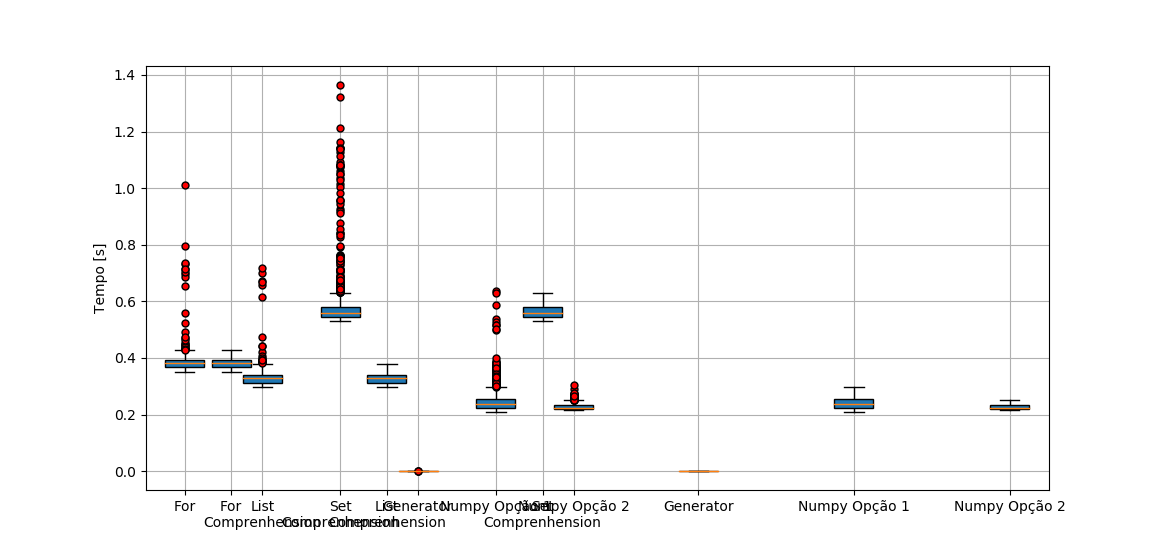

,Mínimo,Máximo,Média,Variância,STD
Generator,3.45599e-07,3.97840e-06,7.83232e-07,1.24188e-13,3.52404e-07
Numpy Opção 2,2.14643e-01,3.02617e-01,2.26668e-01,1.07744e-04,1.03800e-02
Numpy Opção 1,2.09353e-01,6.38054e-01,2.47289e-01,1.78003e-03,4.21904e-02
List\nComprenhension,2.96593e-01,7.16251e-01,3.29568e-01,1.10357e-03,3.32200e-02
For,3.49827e-01,1.01005e+00,3.85478e-01,1.78434e-03,4.22415e-02
Set\nComprenhension,5.30174e-01,1.36311e+00,5.86499e-01,9.75003e-03,9.87422e-02


In [98]:
"""
Graficando os dados e mostrando as estatísticas dos códigos comparados
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
pd.options.display.float_format = '{:.5e}'.format
colunas = "Mínimo Máximo Média Variância STD".split(" ")
filas = "For-List\nComprenhension-Set\nComprenhension-Generator-Numpy Opção 1-Numpy Opção 2".split("-")
resultados = np.array([np.loadtxt("Dados_exemplo1/Dados_exemplo1_for_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_lc_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_sc_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_gen_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_np1_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_np2_repeat=1000_number=5.csv")]).T
comparacao = np.c_[np.amin(resultados, axis=0),
                   np.amax(resultados, axis=0),
                   np.mean(resultados, axis=0),
                   np.var(resultados, axis=0),
                   np.std(resultados, axis=0)]
comparacao_df = pd.DataFrame(data=comparacao,
                             index=filas,
                             columns=colunas)
plt.boxplot(resultados,
            labels=filas,
            patch_artist=True,
            boxprops=dict(facecolor="C0"),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
plt.ylabel("Tempo [s]")
plt.grid(True);
comparacao_df.sort_values(by=["Média"])


## Exemplo 2
Vamos trabalhar com vetor de 1.000.000 valores aleatórios entre com média 5 e desvio padrão de 4,5 e estamos interessados em aplicar a seguinte função e calcular:
$$f(x) = x^3 + {{5} \over {\pi}}x^{{1}\over{2}} – {{x}\over{x^2 + 1}}$$
  - Aplicar a função seno para cada valor;
  - Calcular a soma do novo vetor.
  
  Para conseguir este resultado vamos aplicar:
  - Loop for opção 1;
  - Loop for opção 2;
  - Loop for opção 3;
  - list comprenhension;
  - generator;
  - numpy;
  - map.
---

In [ ]:
import numpy as np
NUMERO_DE_ELEMENTOS = 100_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)

### Utilizando `For` Opção 1

In [ ]:
vetor_fun_for1 = []
soma = 0
for valor in vetor:
    vetor_fun_for1.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun[-1]

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for1 = []
soma = 0
for valor in vetor:
    vetor_fun_for1.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for1[-1]'''
tempo_exemplo2_for1= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_for1_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_for1)

In [ ]:
np.mean(tempo_exemplo2_for1)
np.std(tempo_exemplo2_for1)

### Utilizando `for` opção 2

In [ ]:
vetor_fun_for2 = []
soma = 0.0
for valor in vetor:
    vetor_fun_for2.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for2[-1]

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for2 = []
soma = 0.0
for valor in vetor:
    vetor_fun_for2.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for2[-1]'''
tempo_exemplo2_for2= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_for2_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_for2)
# np.mean(tempo_exemplo2_for2) = 3.1815899256055946
# np.std(tempo_exemplo2_for2) =  0.34918650907524423

### Utilizando `for` opção 3

In [ ]:
vetor_fun_for3 = []
for valor in vetor:
    vetor_fun_for3.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
soma = sum(vetor_fun_for3)

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for3 = []
for valor in vetor:
    vetor_fun_for3.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
soma = sum(vetor_fun_for3)'''
tempo_exemplo2_for3= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_for3_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_for3)

In [ ]:
np.mean(tempo_exemplo2_for3)

### Utilizando `list comprenhension`

In [ ]:
vetor_fun_lc = [valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor]
sum(vetor_fun_lc)

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_lc = [valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor]
sum(vetor_fun_lc)'''
tempo_exemplo2_lc= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_lc_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_lc)

### Utilizando `generetors`

In [ ]:
vetor_fun_gen = (valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor)
sum(vetor_fun_gen)

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_gen = (valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor)
sum(vetor_fun_gen)'''
tempo_exemplo2_gen2= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_gen2_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_gen2)

In [ ]:
np.mean(tempo_exemplo2_gen2)

### Utilizando `Numpy`

In [ ]:
vetor_fun_np = vetor**3 + 5/3.141516*vetor**1/2 - vetor/(vetor**2 + 1)
vetor_fun_np.sum()

In [ ]:
import timeit
REPEAT  = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_np = vetor**3 + 5/3.141516*vetor**1/2 - vetor/(vetor**2 + 1)
vetor_fun_np.sum()'''
tempo_exemplo2_np2= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_np2_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_np2)

In [ ]:
import numpy as np
import time
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
SAMPLES = 250
REPEAT = 5

tempos = []

for i in range(SAMPLES):
    tempo_5 = 0
    for i in range(0, REPEAT):
        t0 = time.time()
        vetor_fun_np = vetor**3 + 5/3.141516*vetor**1/2 - vetor/(vetor**2 + 1)
        vetor_fun_np.sum()
        t1 = time.time()
        tempo_5 += t1 - t0
    tempos.append(tempo_5/REPEAT)


In [ ]:
tempos

In [ ]:
tempo_exemplo2_np2

### Utilizando `map()`

In [ ]:
vetor_fun_map = map(lambda x: x**3 +5/3.141516*x**1/2 - x/(x**2 + 1), vetor)
sum(vetor_fun_map)

In [ ]:
import timeit
REPEAT = 250 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_map = map(lambda x: x**3 +5/3.141516*x**1/2 - x/(x**2 + 1), vetor)
sum(vetor_fun_map)'''
tempo_exemplo2_map = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
np.savetxt(f"Dados_exemplo2_map_repeat={REPEAT}_number={NUMBER}.csv",
           tempo_exemplo2_map)

<IPython.core.display.Javascript object>


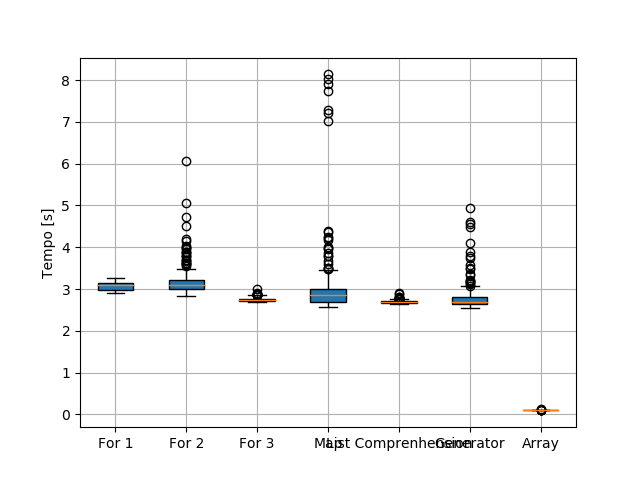

,Mínimo,Máximo,Média,Variância,STD
Array,9.80313e-02,1.25195e-01,1.01839e-01,6.05286e-06,2.46026e-03
List Comprenhension,2.64782e+00,2.89671e+00,2.69795e+00,1.08059e-03,3.28723e-02
For 3,2.68387e+00,2.99305e+00,2.75420e+00,2.06604e-03,4.54537e-02
Generator,2.53779e+00,4.94324e+00,2.79164e+00,1.02795e-01,3.20617e-01
Map,2.58001e+00,8.13596e+00,3.04590e+00,7.14148e-01,8.45073e-01
For 1,2.90484e+00,3.27195e+00,3.07268e+00,7.55399e-03,8.69137e-02
For 2,2.84428e+00,6.05782e+00,3.18159e+00,1.21931e-01,3.49187e-01


In [100]:
"""
Graficando os dados e mostrando as estatísticas dos códigos comparados
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
pd.options.display.float_format = '{:.5e}'.format
colunas = "Mínimo Máximo Média Variância STD".split(" ")
filas = "For 1,For 2,For 3,Map,List Comprenhension,Generator,Array".split(",")
filas_df = list(nome for nome in filas for _ in range(250)) 

resultados = np.array([np.loadtxt("Dados_exemplo2/Dados_exemplo2_for1_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_for2_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_for3_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_map_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_lc_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_gen_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_np_repeat=250_number=5.csv")]).T
comparacao = np.c_[np.amin(resultados, axis=0),
                   np.amax(resultados, axis=0),
                   np.mean(resultados, axis=0),
                   np.var(resultados, axis=0),
                   np.std(resultados, axis=0)]
comparacao_df = pd.DataFrame(data=comparacao,
                             index=filas,
                             columns=colunas)
boxplot_python = plt.boxplot(resultados,
                             labels=filas,
                             patch_artist=True,
                             boxprops=dict(facecolor="C0"),
                             showfliers=True)
plt.ylabel("Tempo [s]")
plt.grid(True);

comparacao_jl_df.sort_values(by=["Média"])
comparacao_df.sort_values(by=["Média"])

<IPython.core.display.Javascript object>


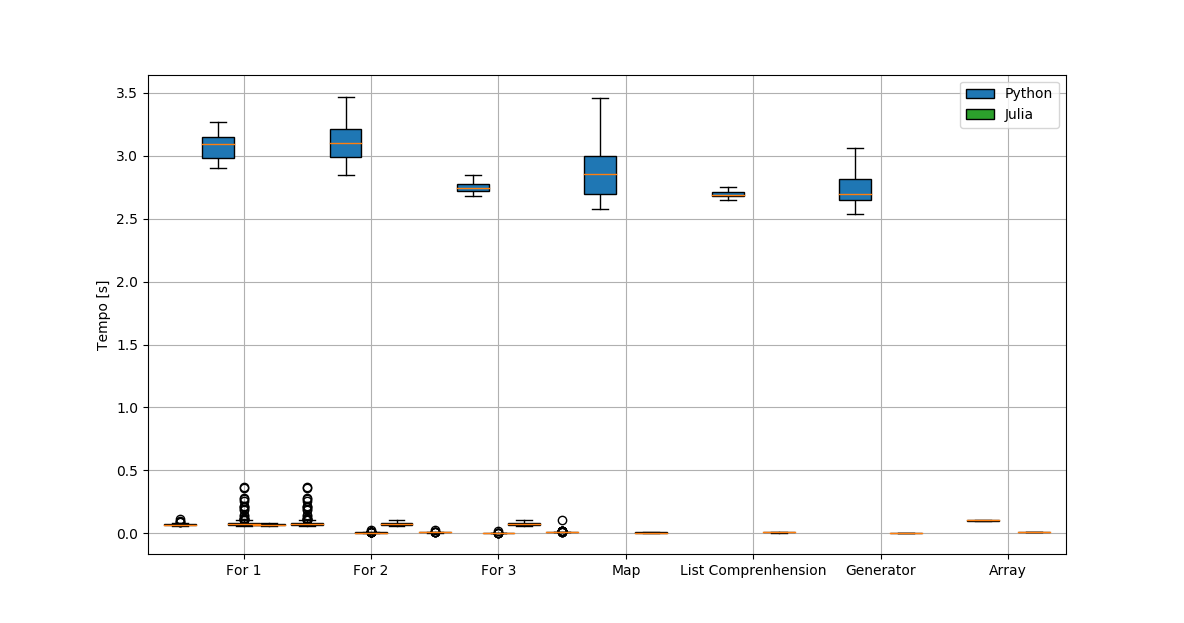

,Mínimo,Máximo,Média,Variância,STD
Generator,4.40000e-03,1.68000e-02,4.97200e-03,5.84656e-07,7.64628e-04
Map,5.40000e-03,2.80000e-02,5.82320e-03,2.08826e-06,1.44508e-03
List Comprenhension,5.40000e-03,2.72000e-02,6.32800e-03,2.16218e-06,1.47043e-03
Array,9.20000e-03,1.06800e-01,1.11016e-02,3.82308e-05,6.18311e-03
For 1,5.82000e-02,1.10800e-01,6.92112e-02,3.61605e-05,6.01336e-03
For 2,5.94000e-02,3.69400e-01,8.29320e-02,1.55589e-03,3.94448e-02
For 3,5.94000e-02,3.69400e-01,8.29320e-02,1.55589e-03,3.94448e-02


In [109]:
# Julia
resultados_jl = np.array([np.loadtxt("Dados_julia/Dados Julia for1 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia for2 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia for2 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia map repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia lc repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia gen repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia arr repeat=5 samples=250.csv")]).T
comparacao_jl = np.c_[np.amin(resultados_jl, axis=0),
                   np.amax(resultados_jl, axis=0),
                   np.mean(resultados_jl, axis=0),
                   np.var(resultados_jl, axis=0),
                   np.std(resultados_jl, axis=0)]
comparacao_jl_df = pd.DataFrame(data=comparacao_jl,
                             index=filas,
                             columns=colunas)

boxplot_julia =plt.boxplot(resultados_jl,
                           labels=filas,
                           patch_artist=True,
                           boxprops=dict(facecolor="C2"),
                           showfliers=True)
plt.ylabel("Tempo [s]")
plt.grid(True)
plt.show();
comparacao_jl_df.sort_values(by=["Média"])

In [110]:
boxplot_python = plt.boxplot(resultados,
                             positions=np.arange(1, len(filas)+1)*2.0-0.4,
                             patch_artist=True,
                             boxprops=dict(facecolor="C0"),
                             showfliers=False)
boxplot_julia =plt.boxplot(resultados_jl,
                           positions=np.arange(1, len(filas)+1)*2.0+0.4,
                           patch_artist=True,
                           boxprops=dict(facecolor="C2"),
                           showfliers=False)
plt.legend([boxplot_python["boxes"][0],
            boxplot_julia["boxes"][0]], ['Python', 'Julia'], loc='upper right')
plt.xticks(np.arange(1, len(filas)+1)*2, filas)
plt.ylabel("Tempo [s]")
plt.grid(True)
plt.show()